# G2M Analysis for Cab Investment

## Introduction

The aim of this notebook is to analyze the cab market before investing using a Go-to-Market strategy. This approach primarily focuses on short-term goals, but a successful strategy also takes into account long-term sustainability.

## 1. Hypotesis

- 1. Is there any seasonability in the demand?
- 2. Which cities are the most profitable?
- 3. Are the profits increasing over the years?
- 4. Which company has maximum cab users?
- 5. Which company has the lowest cost per km?

## 2.  Data Understanding and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.graph_objects as go

In [2]:
# load database
df_cab          = pd.read_csv("DataSets\\Cab_Data.csv")
df_city         = pd.read_csv("DataSets\\City.csv")
df_customer     = pd.read_csv("DataSets\\Customer_ID.csv")
df_transaction  = pd.read_csv("DataSets\\Transaction_ID.csv")

In [3]:
# create a dictionary to iterate over the datasets

df_dic= {"Cab_Data":df_cab, "City":df_city, "Customer_ID":df_customer, "Transaction_ID":df_transaction}

In [4]:
def quick_view_of_dataset(dataset_dic):

    # prints some general data of the dataset
    
    for item in dataset_dic.items():
            print(f"------{item[0]}------")
            print('Rows =',item[1].shape[0], ' | Columns = ', item[1].shape[1])
            print("\n")
            print("head ","-"*100)
            print(item[1].head())
            print("\n")
            print("type","-"*100)
            print(item[1].dtypes)
            print("\n")
            print("describe","-"*100)
            print(item[1].describe())
            print("\n")
            print("info","-"*100)
            print(item[1].info())
            print("\n")
            print("null","-"*100)
            print(item[1].isnull().sum())
            print("*"*100)

In [5]:
# familiarize with the dataset

# print all the valuable information of each DataSets together and separate it by titles

quick_view_of_dataset(df_dic)

------Cab_Data------
Rows = 359392  | Columns =  7


head  ----------------------------------------------------------------------------------------------------
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


type ----------------------------------------------------------------------------------------------------
Transaction ID      int64
Date of Travel      int64
Company            object
City             

After having analyzed the data we found errors in Cab_Data\Date of Travel, City\Population, and City\Users. You have to transform this data to be read correctly by python

In [6]:
# fixing the data of City

def clean_comma_column(df, column):
    df[column] = [x.replace(',','') for x in df[column]]
    df[column] = df[column].astype(int)
    return df

clean_comma_column(df_city,"Population")
clean_comma_column(df_city,"Users")

City  Population   Users
0        NEW YORK NY     8405837  302149
1         CHICAGO IL     1955130  164468
2     LOS ANGELES CA     1595037  144132
3           MIAMI FL     1339155   17675
4     SILICON VALLEY     1177609   27247
5      ORANGE COUNTY     1030185   12994
6       SAN DIEGO CA      959307   69995
7         PHOENIX AZ      943999    6133
8          DALLAS TX      942908   22157
9         ATLANTA GA      814885   24701
10         DENVER CO      754233   12421
11         AUSTIN TX      698371   14978
12        SEATTLE WA      671238   25063
13         TUCSON AZ      631442    5712
14  SAN FRANCISCO CA      629591  213609
15     SACRAMENTO CA      545776    7044
16     PITTSBURGH PA      542085    3643
17     WASHINGTON DC      418859  127001
18      NASHVILLE TN      327225    9270
19         BOSTON MA      248968   80021

In [7]:
df_city.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [8]:
def to_date_format(n):
    
    # convert excel or csv date format into a python readable format
    
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [9]:
# fixing the data of Date of Travel

df_cab["Date of Travel"]=df_cab["Date of Travel"].apply(lambda x:to_date_format(x))

In [10]:
df_cab.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-01  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-06  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-02  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [11]:
df_cab=df_cab.sort_values(by=["Date of Travel"])
df_cab=df_cab.reset_index(drop= True )

In [12]:
df_cab.head()

Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-01  Yellow Cab  WASHINGTON DC         10.20   
1        10000640     2016-01-01  Yellow Cab     CHICAGO IL         15.60   
2        10000635     2016-01-01  Yellow Cab     CHICAGO IL         25.08   
3        10001001     2016-01-01  Yellow Cab    NEW YORK NY         46.80   
4        10000171     2016-01-01    Pink Cab   SAN DIEGO CA         14.28   

   Price Charged  Cost of Trip  
0         202.54      135.8640  
1         374.66      209.6640  
2         532.83      337.0752  
3        1391.91      595.2960  
4         269.15      147.0840

### Variable Description
#### Cab_data
1. Transaction ID = Unique identify number to each passanger for transaction
2. Date of Travel
3. Company = Preferred company for travel
4. City = City of travel
5. KM Travelled = Distance of travel
6. Price Charged = Amount of money for travel
7. Cost of Trip = Amount of cost for travel

- Categorical variable:   Company, City
- Numerical Variable:     Transaction ID , Date of Travel, KM Travelled, Price Charged, Cost of Trip

#### City
1. City = City names
2. Population = Population of cities
3. Users = Population of cab users for each city

- Categorical variable:   None
- Numerical Variable:     Population, Users

#### Customer_ID
1. Customer ID = Unique identify number for each passanger
2. Gender = Gender of each passanger (Male/Female)
3. Age = Age of each passanger
4. Income (USD/Month) = Amount of income for each passanger

- Categorical variable:   Gender, Age
- Numerical Variable:     Customer ID, Income

##### Transaction_ID
1. Transaction ID = Unique identify number to each passanger for transaction
2. Customer ID = Unique identify number for each passanger
3. Payment_Mode = Payment type, might be cash or card

- Categorical variable:   Payment_Mode
- Numerical Variable:     Transaction ID, Costumer ID

## New Data Frame

After cleaning the data, a df is created which matches all its columns to make it easier to manipulate

In [13]:
# Create a dataframe that includes all datasets

df_main = df_cab.merge(df_transaction, on= "Transaction ID").merge(df_customer, on ="Customer ID").merge(df_city, on = "City")

a quick overview of our new df

In [14]:
df_main

Transaction ID Date of Travel     Company           City  \
0             10001340     2016-01-01  Yellow Cab  WASHINGTON DC   
1             10020018     2016-03-25  Yellow Cab  WASHINGTON DC   
2             10102932     2016-11-08    Pink Cab  WASHINGTON DC   
3             10164725     2017-04-16  Yellow Cab  WASHINGTON DC   
4             10188478     2017-06-23  Yellow Cab  WASHINGTON DC   
...                ...            ...         ...            ...   
359387        10433605     2018-12-24    Pink Cab  PITTSBURGH PA   
359388        10433603     2018-12-27    Pink Cab  PITTSBURGH PA   
359389        10435910     2018-12-28  Yellow Cab  PITTSBURGH PA   
359390        10435908     2018-12-28  Yellow Cab  PITTSBURGH PA   
359391        10439410     2018-12-30  Yellow Cab  PITTSBURGH PA   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              10.20         202.54      135.8640        52536         Card   
1               5.94          88.50       74.1312        52536         Cash   
2              15.21         179.33      153.6210        52536         Cash   
3               8.08         123.21      104.7168        52536         Card   
4              13.80         283.74      168.9120        52536         Cash   
...              ...            ...           ...          ...          ...   
359387         21.66         345.03      246.9240        49629         Card   
359388          6.79         119.55       67.9000        49372         Cash   
359389         18.81         372.10      252.8064        48042         Cash   
359390         30.80         538.31      413.9520        48061         Card   
359391          4.04          81.05       52.8432        50921         Card   

        Gender  Age  Income (USD/Month)  Population   Users  
0         Male   24               10606      418859  127001  
1         Male   24               10606      418859  127001  
2         Male   24               10606      418859  127001  
3         Male   24               10606      418859  127001  
4         Male   24               10606      418859  127001  
...        ...  ...                 ...         ...     ...  
359387  Female   48               27228      542085    3643  
359388  Female   44               22278      542085    3643  
359389  Female   33                7830      542085    3643  
359390  Female   32               22408      542085    3643  
359391    Male   33               18698      542085    3643  

[359392 rows x 14 columns]

In [15]:
df_main.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                     int32
Users                          int32
dtype: object

In [16]:
# Check if there are duplicates in the dataset. I consider duplicates, the ones that have the same ID 

df_main_2=df_main.drop_duplicates(subset=["Transaction ID"])

df_main_2.shape==df_main.shape

True

### New Labels

In [17]:
# add a new column with the yaer of travel

df_main["Year of Travel"] = pd.DatetimeIndex(df_main["Date of Travel"]).year

In [18]:
def station_starting_date(date):
    
    # add a new column with the season of the year based on the dates
    
    year = str(date.year)
    seasons = {"Spring": pd.date_range(start=year+"/03/21", end=year+"/06/20"),
               "Summer": pd.date_range(start=year+"/06/21", end=year+"/09/22"),
               "Autumn": pd.date_range(start=year+"/09/23", end=year+"/12/20")}
               
    if date in seasons["Spring"]:
        return "Spring"
    if date in seasons["Summer"]:
        return "Summer"
    if date in seasons["Autumn"]:
        return "Autumn"
    else:
        return "Winter"

    
df_main["Season"]=df_main["Date of Travel"].apply(station_starting_date)


In [19]:
def quarter_of_date(date):
    
    # add a new column with the quarter of the year based on the dates
    
    year = str(date.year)
    seasons = {"Q1": pd.date_range(start=year+"/01/01", end=year+"/03/31"),
               "Q2": pd.date_range(start=year+"/04/01", end=year+"/06/30"),
               "Q3": pd.date_range(start=year+"/07/01", end=year+"/09/30")}
    if date in seasons["Q1"]:
        return "Q1"
    if date in seasons["Q2"]:
        return "Q2"
    if date in seasons["Q3"]:
        return "Q3"
    else:
        return "Q4"
    
df_main["Quarter"]=df_main["Date of Travel"].apply(quarter_of_date)

In [20]:
def calculate_profit(row):
    
    # calculates the profit from the price and cost columns
    
    profit = row["Price Charged"] - row["Cost of Trip"]
    return profit

df_main["Profit"] = df_main.apply(calculate_profit, axis=1)

## 3.  Exploratory Data Analysis

In [21]:
df_main

Transaction ID Date of Travel     Company           City  \
0             10001340     2016-01-01  Yellow Cab  WASHINGTON DC   
1             10020018     2016-03-25  Yellow Cab  WASHINGTON DC   
2             10102932     2016-11-08    Pink Cab  WASHINGTON DC   
3             10164725     2017-04-16  Yellow Cab  WASHINGTON DC   
4             10188478     2017-06-23  Yellow Cab  WASHINGTON DC   
...                ...            ...         ...            ...   
359387        10433605     2018-12-24    Pink Cab  PITTSBURGH PA   
359388        10433603     2018-12-27    Pink Cab  PITTSBURGH PA   
359389        10435910     2018-12-28  Yellow Cab  PITTSBURGH PA   
359390        10435908     2018-12-28  Yellow Cab  PITTSBURGH PA   
359391        10439410     2018-12-30  Yellow Cab  PITTSBURGH PA   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              10.20         202.54      135.8640        52536         Card   
1               5.94          88.50       74.1312        52536         Cash   
2              15.21         179.33      153.6210        52536         Cash   
3               8.08         123.21      104.7168        52536         Card   
4              13.80         283.74      168.9120        52536         Cash   
...              ...            ...           ...          ...          ...   
359387         21.66         345.03      246.9240        49629         Card   
359388          6.79         119.55       67.9000        49372         Cash   
359389         18.81         372.10      252.8064        48042         Cash   
359390         30.80         538.31      413.9520        48061         Card   
359391          4.04          81.05       52.8432        50921         Card   

        Gender  Age  Income (USD/Month)  Population   Users  Year of Travel  \
0         Male   24               10606      418859  127001            2016   
1         Male   24               10606      418859  127001            2016   
2         Male   24               10606      418859  127001            2016   
3         Male   24               10606      418859  127001            2017   
4         Male   24               10606      418859  127001            2017   
...        ...  ...                 ...         ...     ...             ...   
359387  Female   48               27228      542085    3643            2018   
359388  Female   44               22278      542085    3643            2018   
359389  Female   33                7830      542085    3643            2018   
359390  Female   32               22408      542085    3643            2018   
359391    Male   33               18698      542085    3643            2018   

        Season Quarter    Profit  
0       Winter      Q1   66.6760  
1       Spring      Q1   14.3688  
2       Autumn      Q4   25.7090  
3       Spring      Q2   18.4932  
4       Summer      Q2  114.8280  
...        ...     ...       ...  
359387  Winter      Q4   98.1060  
359388  Winter      Q4   51.6500  
359389  Winter      Q4  119.2936  
359390  Winter      Q4  124.3580  
359391  Winter      Q4   28.2068  

[359392 rows x 18 columns]

In [22]:
df_main.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age  Income (USD/Month)    Population  \
count  359392.000000  359392.000000       359392.000000  3.593920e+05   
mean    19191.652115      35.336705        15048.822937  3.132198e+06   
std     21012.412463      12.594234         7969.409482  3.315194e+06   
min         1.000000      18.000000         2000.000000  2.489680e+05   
25%      2705.000000      25.000000         8424.000000  6.712380e+05   
50%      7459.000000      33.000000        14685.000000  1.595037e+06   
75%     36078.000000      42.000000        21035.000000  8.405837e+06   
max     60000.000000      65.000000        35000.000000  8.405837e+06   

               Users  Year of Travel         Profit  
count  359392.000000   359392.000000  359392.000000  
mean   158365.582267     2017.041693     137.253198  
std    100850.051020        0.801378     160.311840  
min      3643.000000     2016.000000    -220.060000  
25%     80021.000000     2016.000000      28.012000  
50%    144132.000000     2017.000000      81.962000  
75%    302149.000000     2018.000000     190.030000  
max    302149.000000     2018.000000    1463.966000

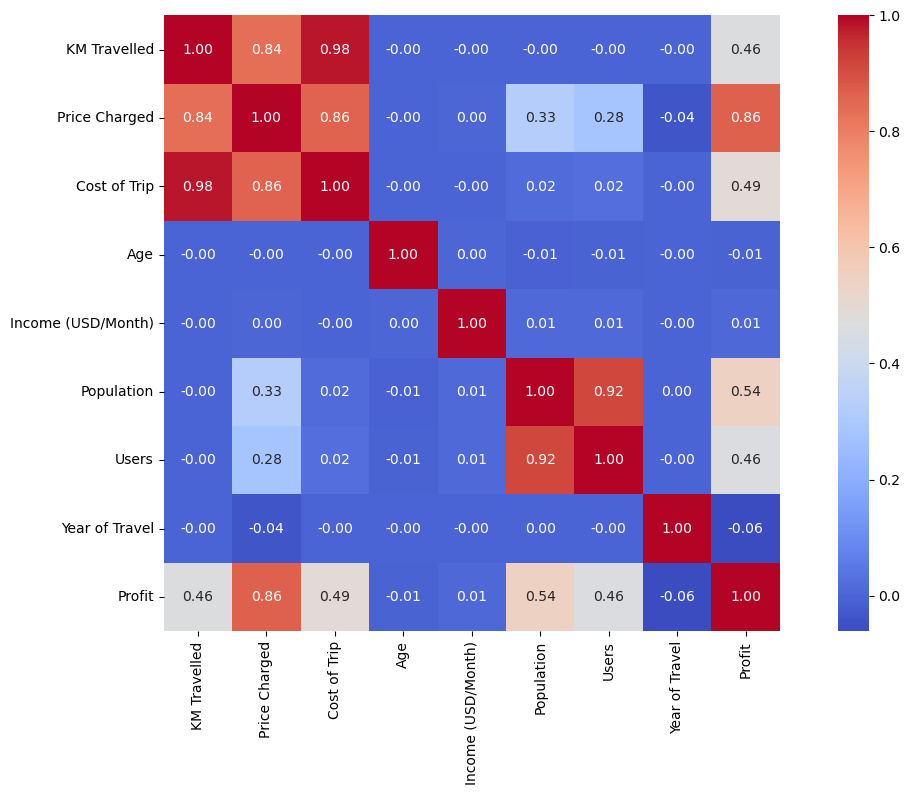

In [23]:
#Correlation among important features for analysis

df_main_corr=df_main.drop(["Transaction ID","Customer ID"],axis=1)

plt.rcParams["figure.figsize"] = (15,8)
corr = df_main_corr.corr()
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= ".2f",annot_kws={"size": 10},
            cmap= "coolwarm")
plt.show()

['Card' 'Cash']


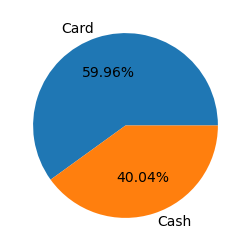

Card    59.963494
Cash    40.036506
Name: Payment_Mode, dtype: float64


In [24]:
# distribution of payment mode

print(df_main["Payment_Mode"].unique())
pay_mode_per=df_main["Payment_Mode"].value_counts()/df_main.shape[0]*100

labels=("Card","Cash")

fig = plt.figure(figsize=(5,3)); ax = plt.axes()

ax.pie(pay_mode_per, labels = labels ,autopct='%1.2f%%')
plt.show()

print(pay_mode_per)

['Male' 'Female']


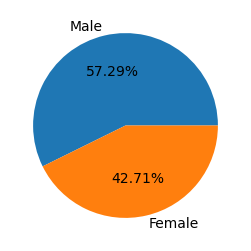

Male      57.294542
Female    42.705458
Name: Gender, dtype: float64


In [25]:
# distribution of Gender

print(df_main["Gender"].unique())
pay_mode_per=df_main["Gender"].value_counts()/df_main.shape[0]*100

labels=("Male","Female")

fig = plt.figure(figsize=(5,3)); ax = plt.axes()

ax.pie(pay_mode_per, labels = labels ,autopct='%1.2f%%')
plt.show()

print(pay_mode_per)

It is a fairly equal market in the means of payment. There is a preponderance for the cards but not surprising

Text(0.5, 0, 'Age')

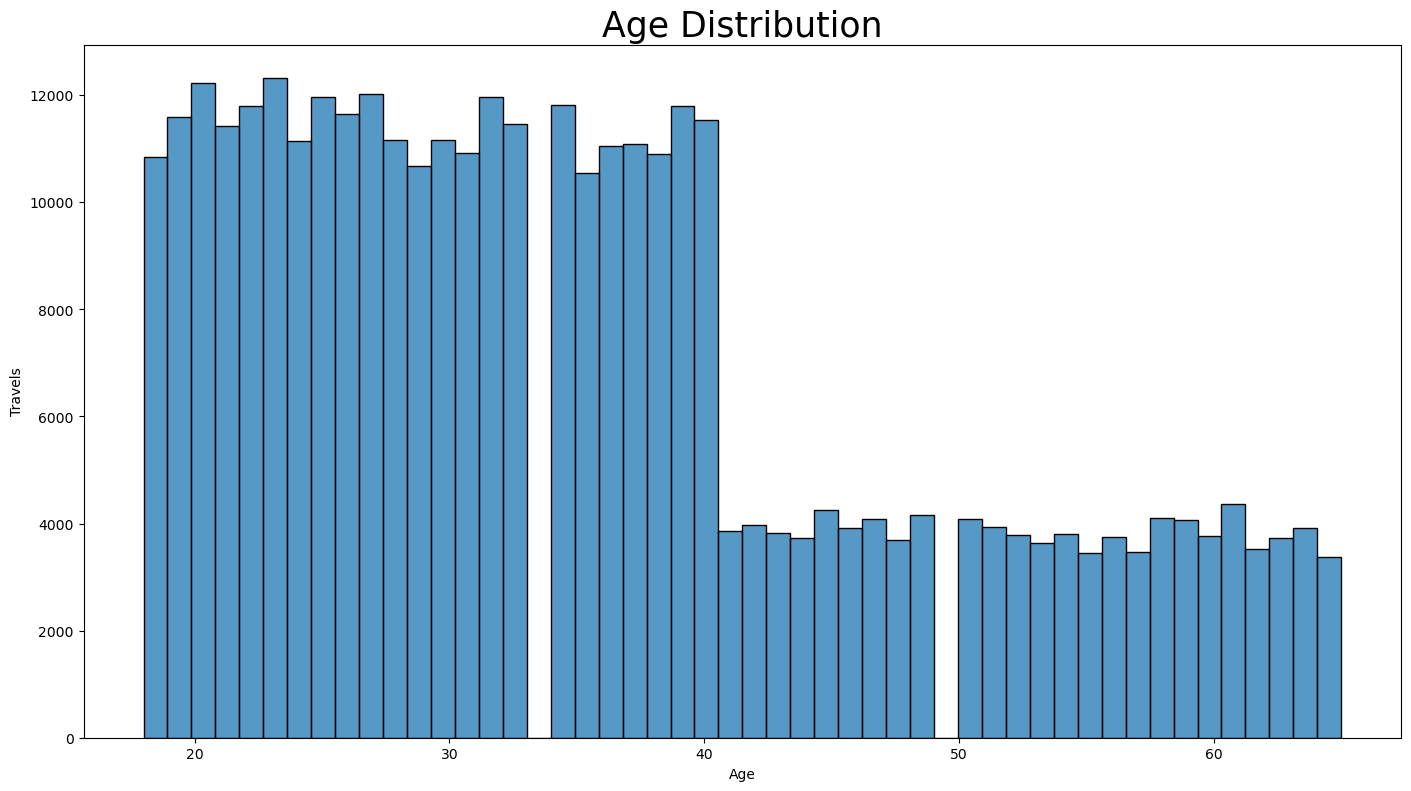

In [26]:
#Age would be an important feature

plt.figure(figsize=(17,9))
sns.histplot(data=df_main, x='Age', bins=50)
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Travels')
plt.xlabel('Age')

There is a big drop after 40 years

Text(0.5, 0, 'Price Charged')

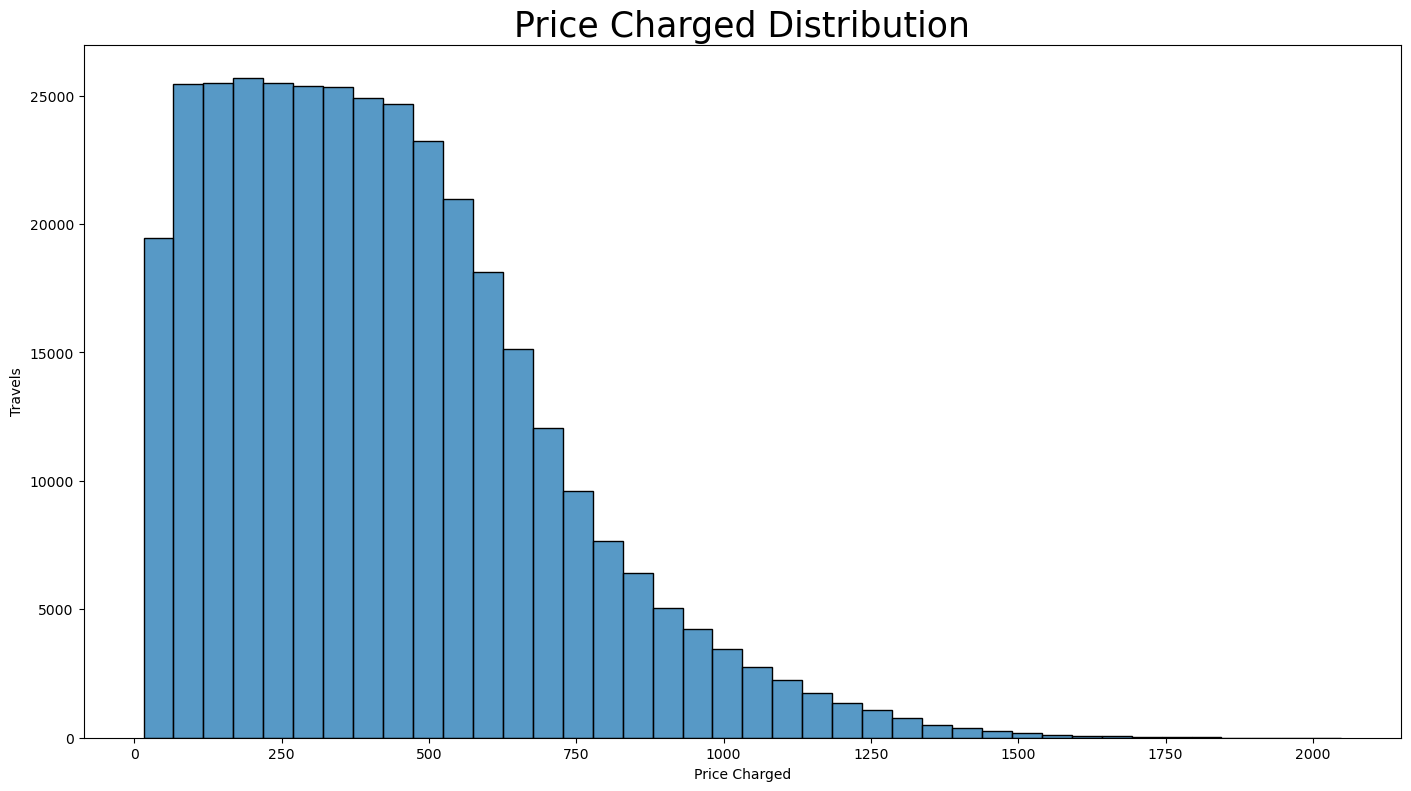

In [27]:
# Distribution of Price Charged

plt.figure(figsize=(17,9))
sns.histplot(data=df_main, x='Price Charged', bins=40)
plt.title('Price Charged Distribution', fontsize=25)
plt.ylabel('Travels')
plt.xlabel('Price Charged')

Text(0.5, 0, 'Cost of Trip')

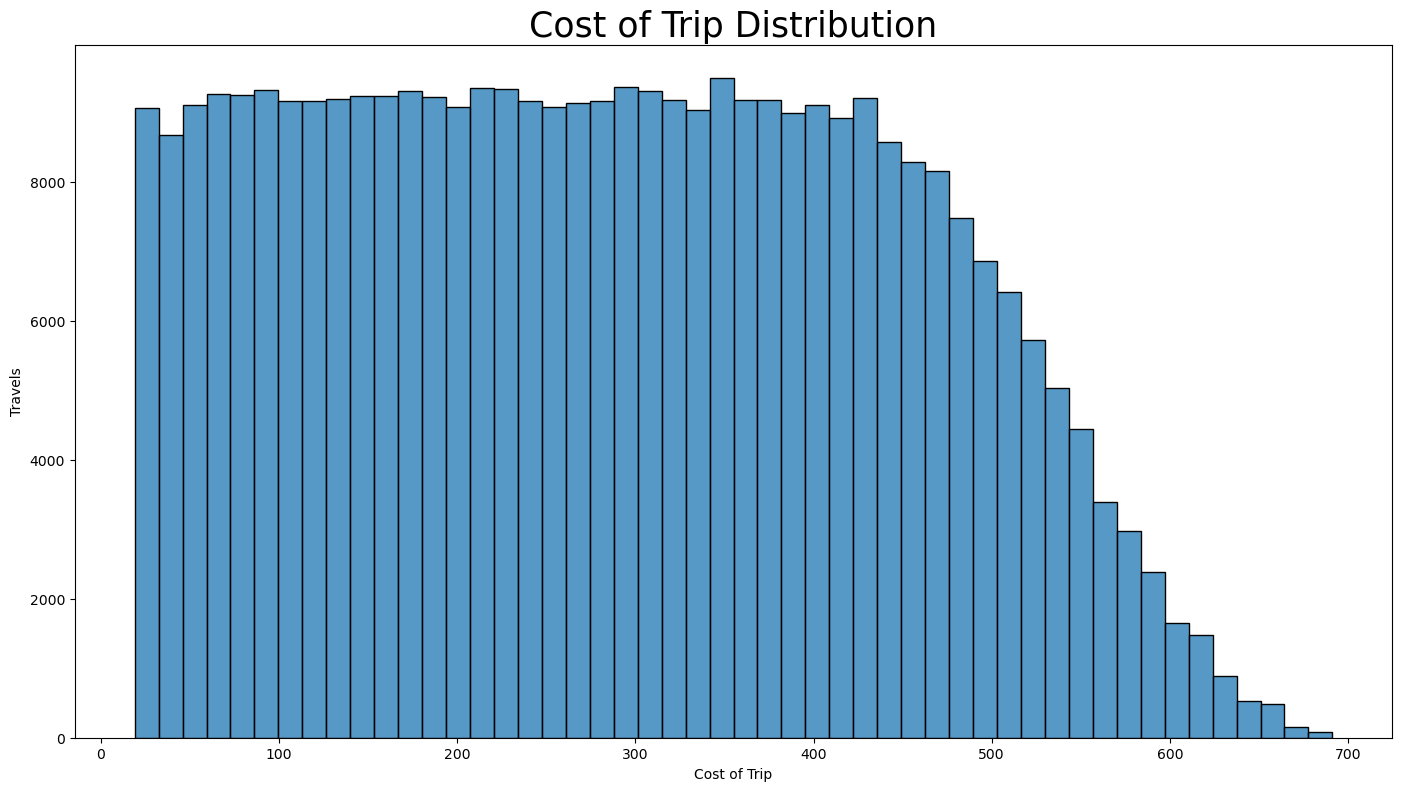

In [28]:
# Distribution of Cost per Trip

plt.figure(figsize=(17,9))
sns.histplot(data=df_main, x='Cost of Trip',bins=50)
plt.title('Cost of Trip Distribution', fontsize=25)
plt.ylabel('Travels')
plt.xlabel('Cost of Trip')

Text(0.5, 1.0, 'Travels per Season')

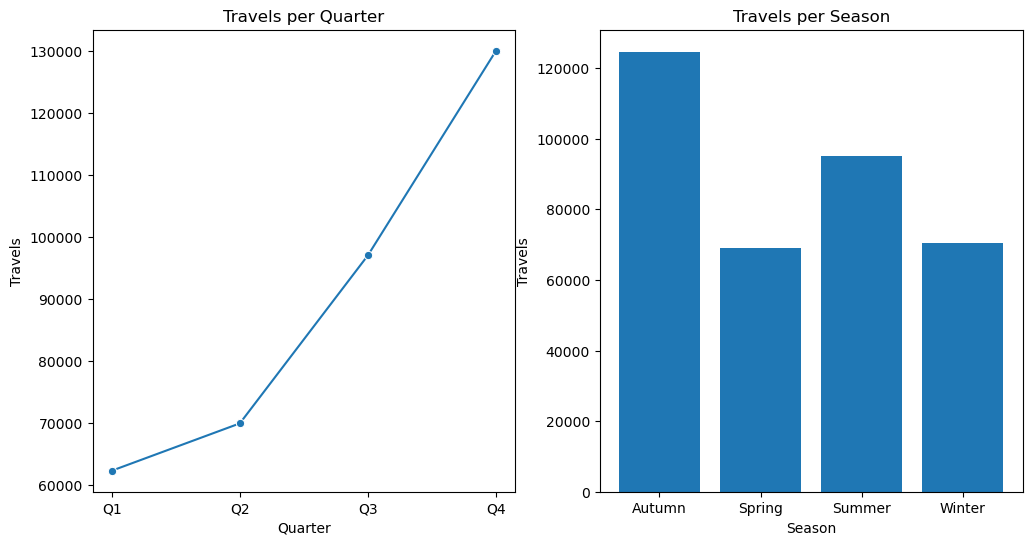

In [29]:
# Number of trips depending on the time of year

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
quarter_travels = df_main.groupby(['Quarter'])['Transaction ID'].count()
sns.lineplot(data=quarter_travels, x=quarter_travels.index, y=quarter_travels, marker='o')
plt.xlabel('Quarter')
plt.ylabel('Travels')
plt.title('Travels per Quarter')

plt.subplot(1,2,2)
season_travels = df_main.groupby(['Season'])['Transaction ID'].count()
plt.bar(season_travels.index,season_travels)
plt.xlabel('Season')
plt.ylabel('Travels')
plt.title('Travels per Season')

Text(0.5, 0, 'Year ["Quarter"]')

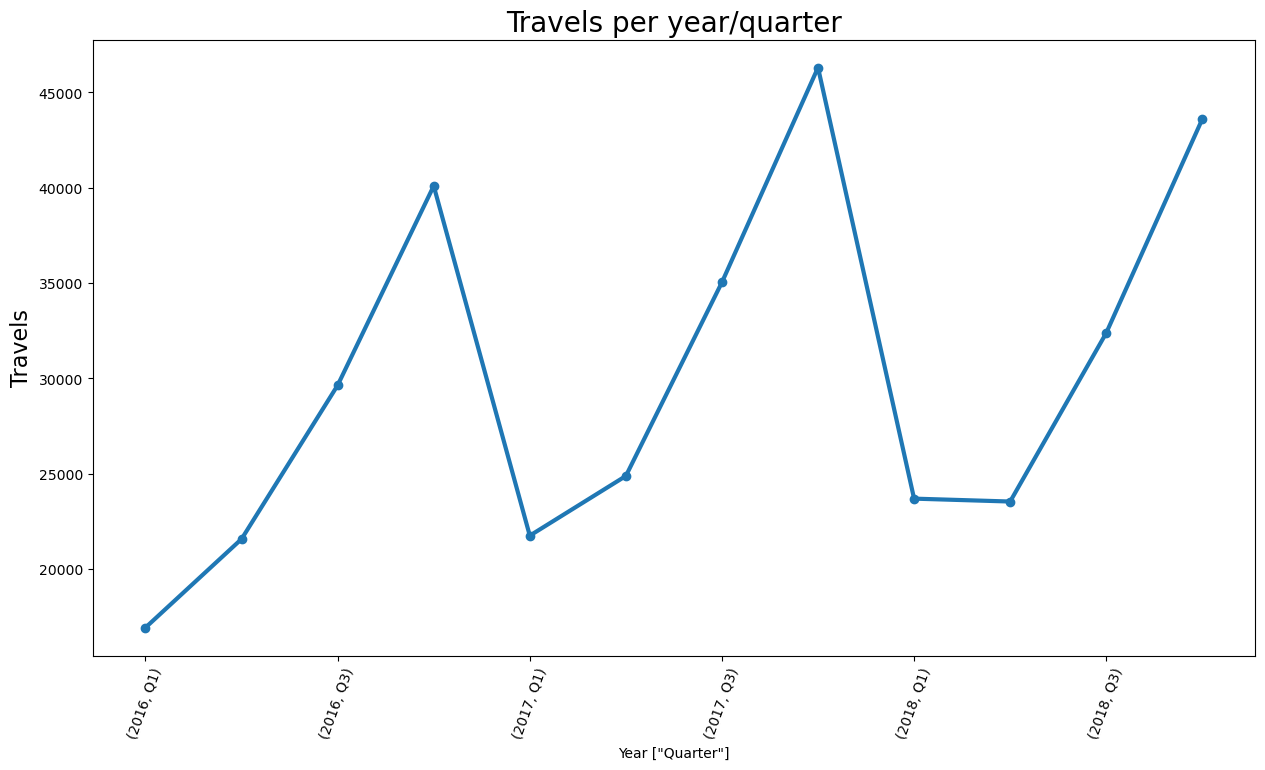

In [30]:
# Number of trips depending on the time of year over time

q_year_main=df_main.groupby(['Year of Travel', 'Quarter'])['Transaction ID'].count()

q_year_main.plot.line(label='Travels per year/quarter',linewidth=3, marker='o')
plt.xticks(rotation =70)
plt.ylabel('Travels', fontsize=16)
plt.title('Travels per year/quarter',fontsize=20)
plt.xlabel('Year ["Quarter"]')

Based on the information provided by the graphs, we can see how the demand increases as the year goes by. Normally, Q1 is the moment with the lowest demand and Q4 the moment of greatest demand.

The quarter coincides with the winter and fall seasons.

Text(0.5, 0, 'City')

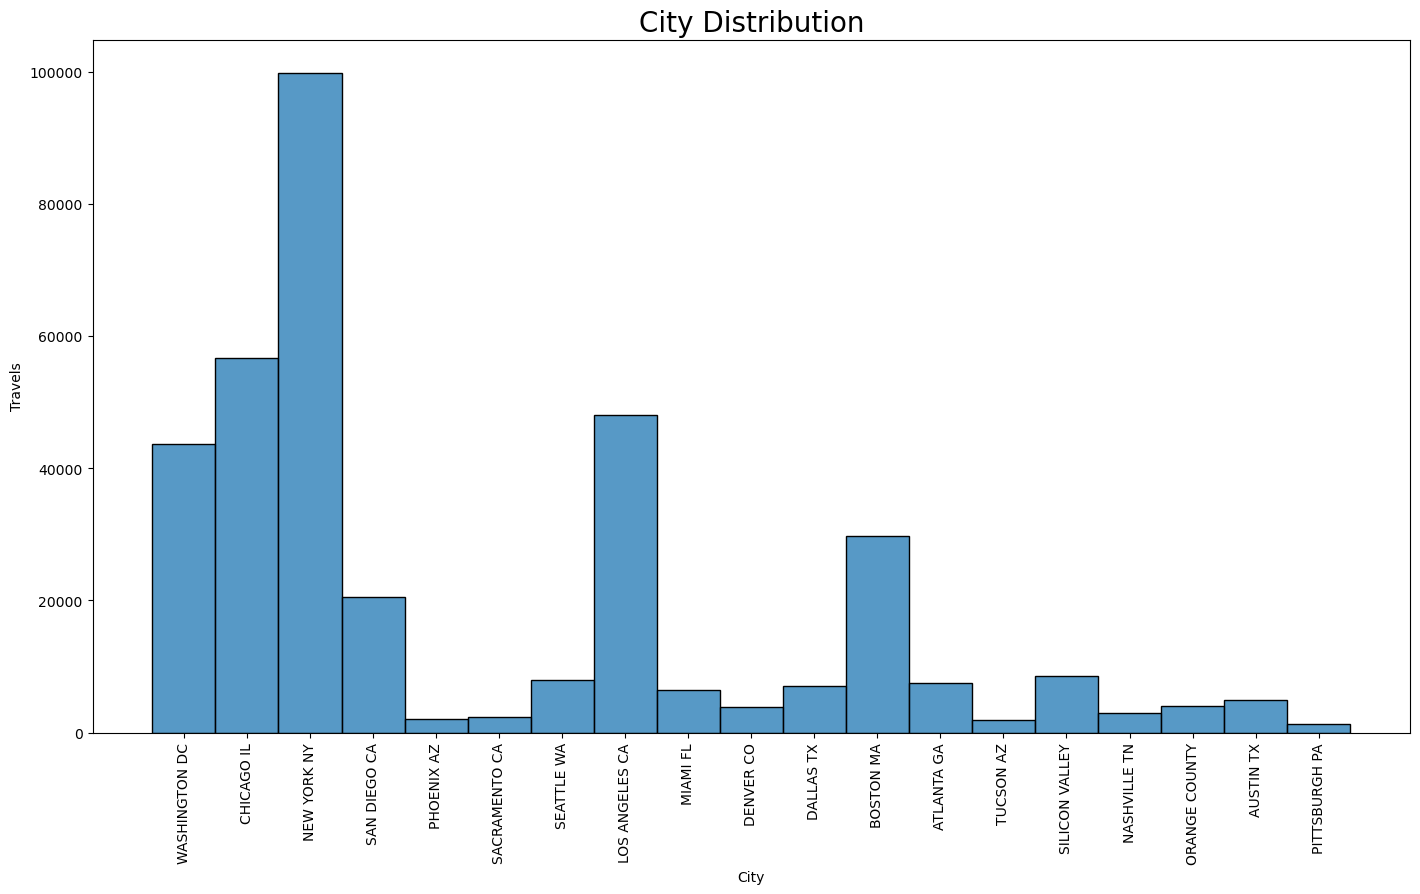

In [31]:
# number of trips per city

plt.figure(figsize=(17,9))


ax=sns.histplot(data=df_main, x="City",bins=40)
plt.setp( ax.get_xticklabels(),rotation=90)
plt.title('City Distribution', fontsize=20)
plt.ylabel('Travels')
plt.xlabel('City')

We can find that the 3 cities in which cabs are most used are Washington DC, Cicago IL, New York NY.

They are fairly populated cities with high population density.
The 3 have the characteristic that they are cities with a large office workforce.

### Comparison of the market companies

In [32]:
# Profit, Price and Cost along the years in both companies

pd.set_option('display.float_format', lambda x: '%.2f' % x)

comparison = df_main.groupby(['Company', 'Year of Travel'])[["Profit","Price Charged","Cost of Trip"]].sum()
comparison

Profit  Price Charged  Cost of Trip
Company    Year of Travel                                         
Pink Cab   2016            1739882.63     7986269.04    6246386.41
           2017            2015100.66     9530736.47    7515635.81
           2018            1552345.04     8811245.82    7258900.78
Yellow Cab 2016           14073886.48    38833629.82   24759743.34
           2017           16464267.14    45582913.86   29118646.72
           2018           13482219.55    41437343.51   27955123.96

In [33]:
# Profit Values

profit_comp_y=df_main.pivot_table('Profit', index='Year of Travel', columns='Company', aggfunc=sum)
profit_comp_y

Company          Pink Cab  Yellow Cab
Year of Travel                       
2016           1739882.63 14073886.48
2017           2015100.66 16464267.14
2018           1552345.04 13482219.55

In [34]:
palette = {"Yellow Cab": "yellow", "Pink Cab": "mediumvioletred"}

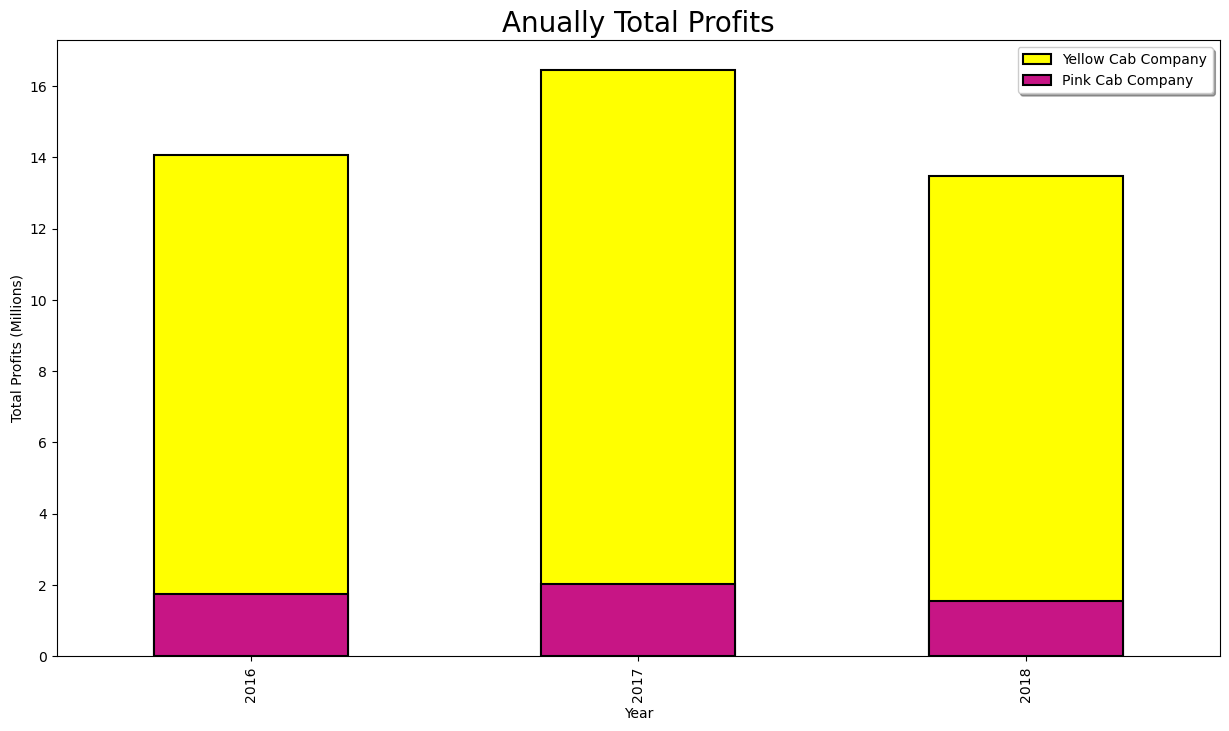

In [35]:
# comparison of profit in different years

x1=profit_comp_y["Yellow Cab"]/1000000
x2=profit_comp_y["Pink Cab"]/1000000
fig= x1.plot.bar(color = 'yellow',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=x2.plot.bar(color = 'mediumvioletred',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel("Total Profits (Millions)")
plt.title('Anually Total Profits',fontsize=20)
plt.xlabel('Year')
plt.legend(loc='best', shadow=True)


<AxesSubplot:xlabel='Profit', ylabel='Count'>

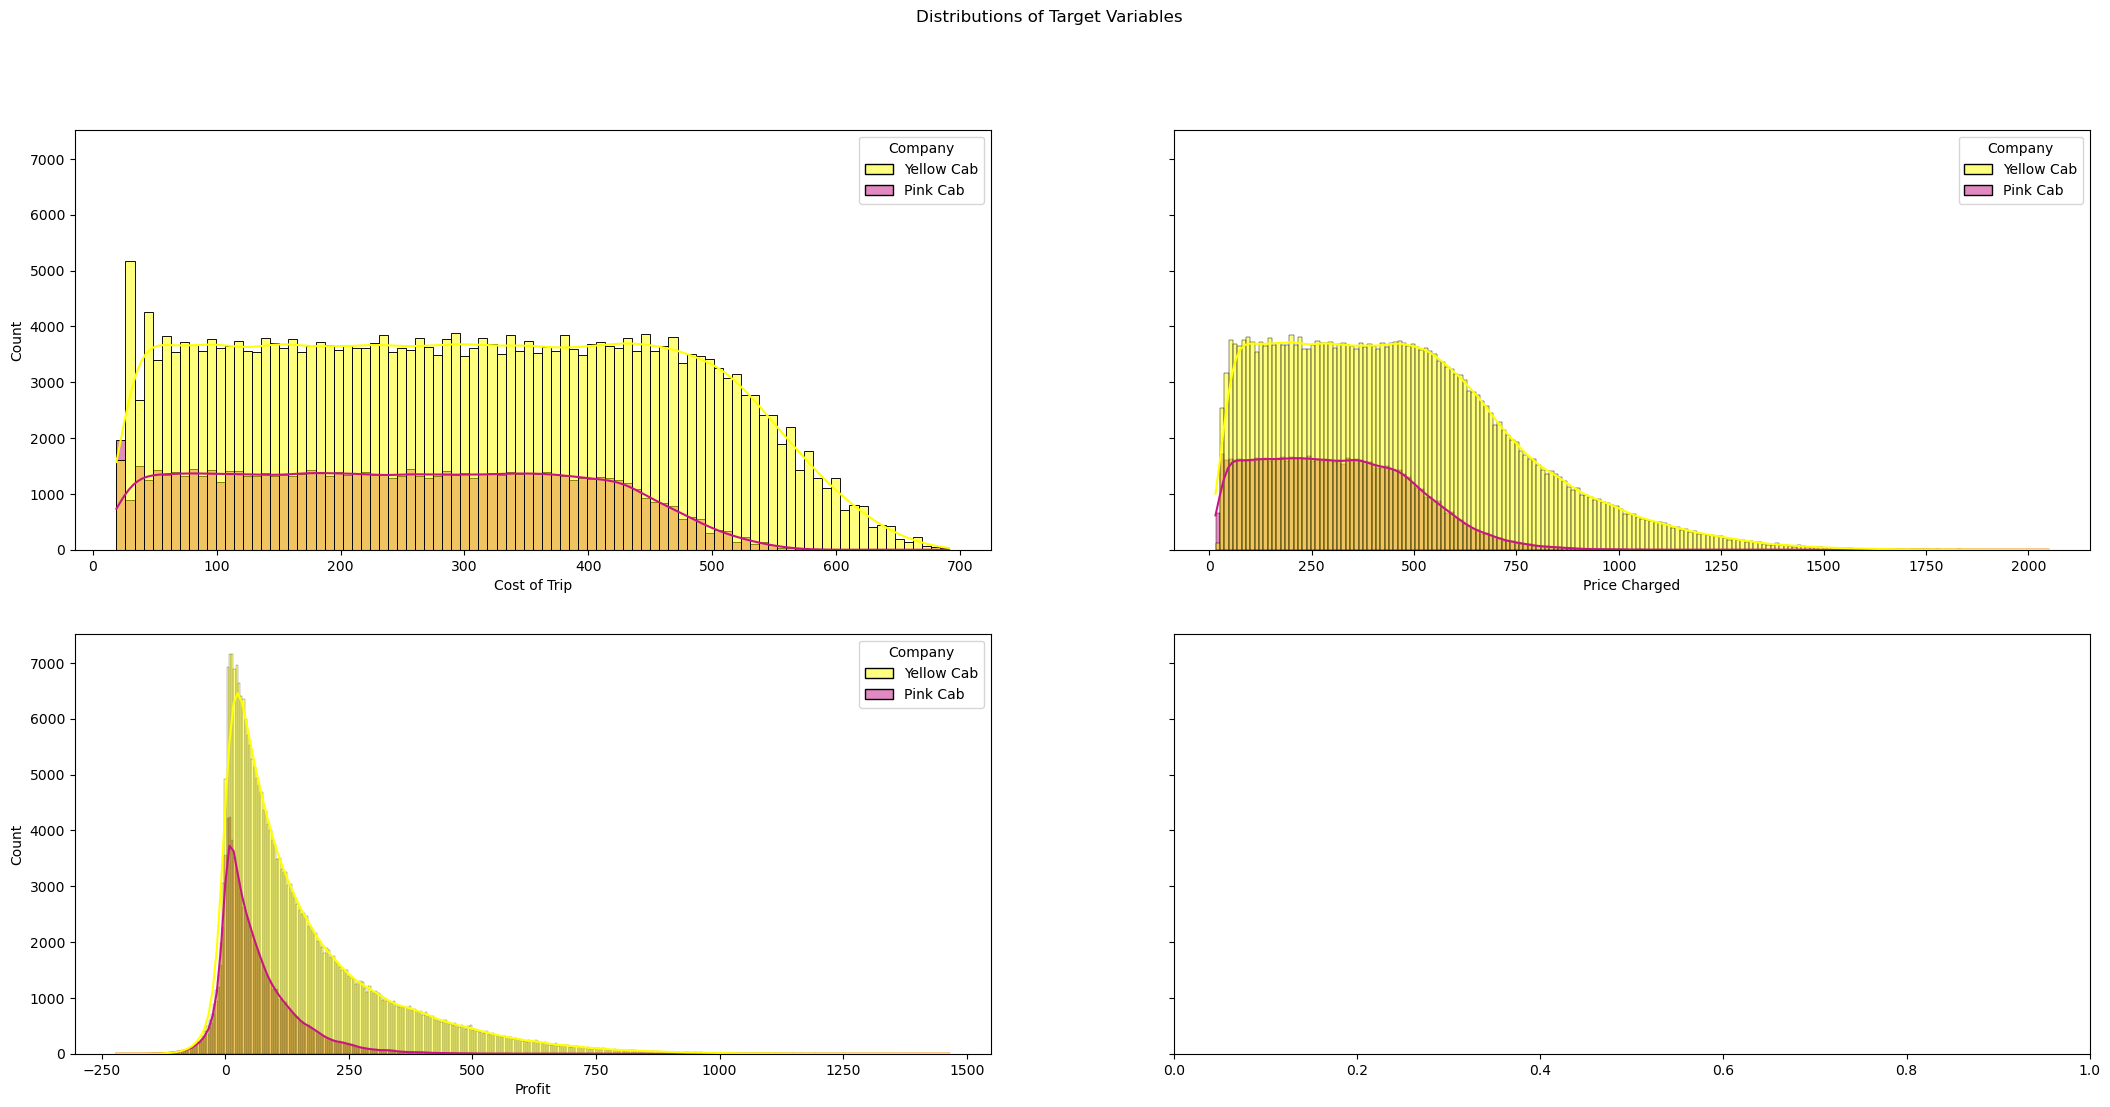

In [36]:
# comparison of other values

fig,axes = plt.subplots(2, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=df_main , x='Cost of Trip'   , kde = True , hue="Company", palette=palette)
sns.histplot(ax=axes[0,1], data=df_main , x='Price Charged'  , kde = True , hue="Company", palette=palette)
sns.histplot(ax=axes[1,0], data=df_main , x='Profit'         , kde = True , hue="Company", palette=palette) 

[Text(0.5, 0, 'Company'), Text(0, 0.5, 'Mean Profit')]

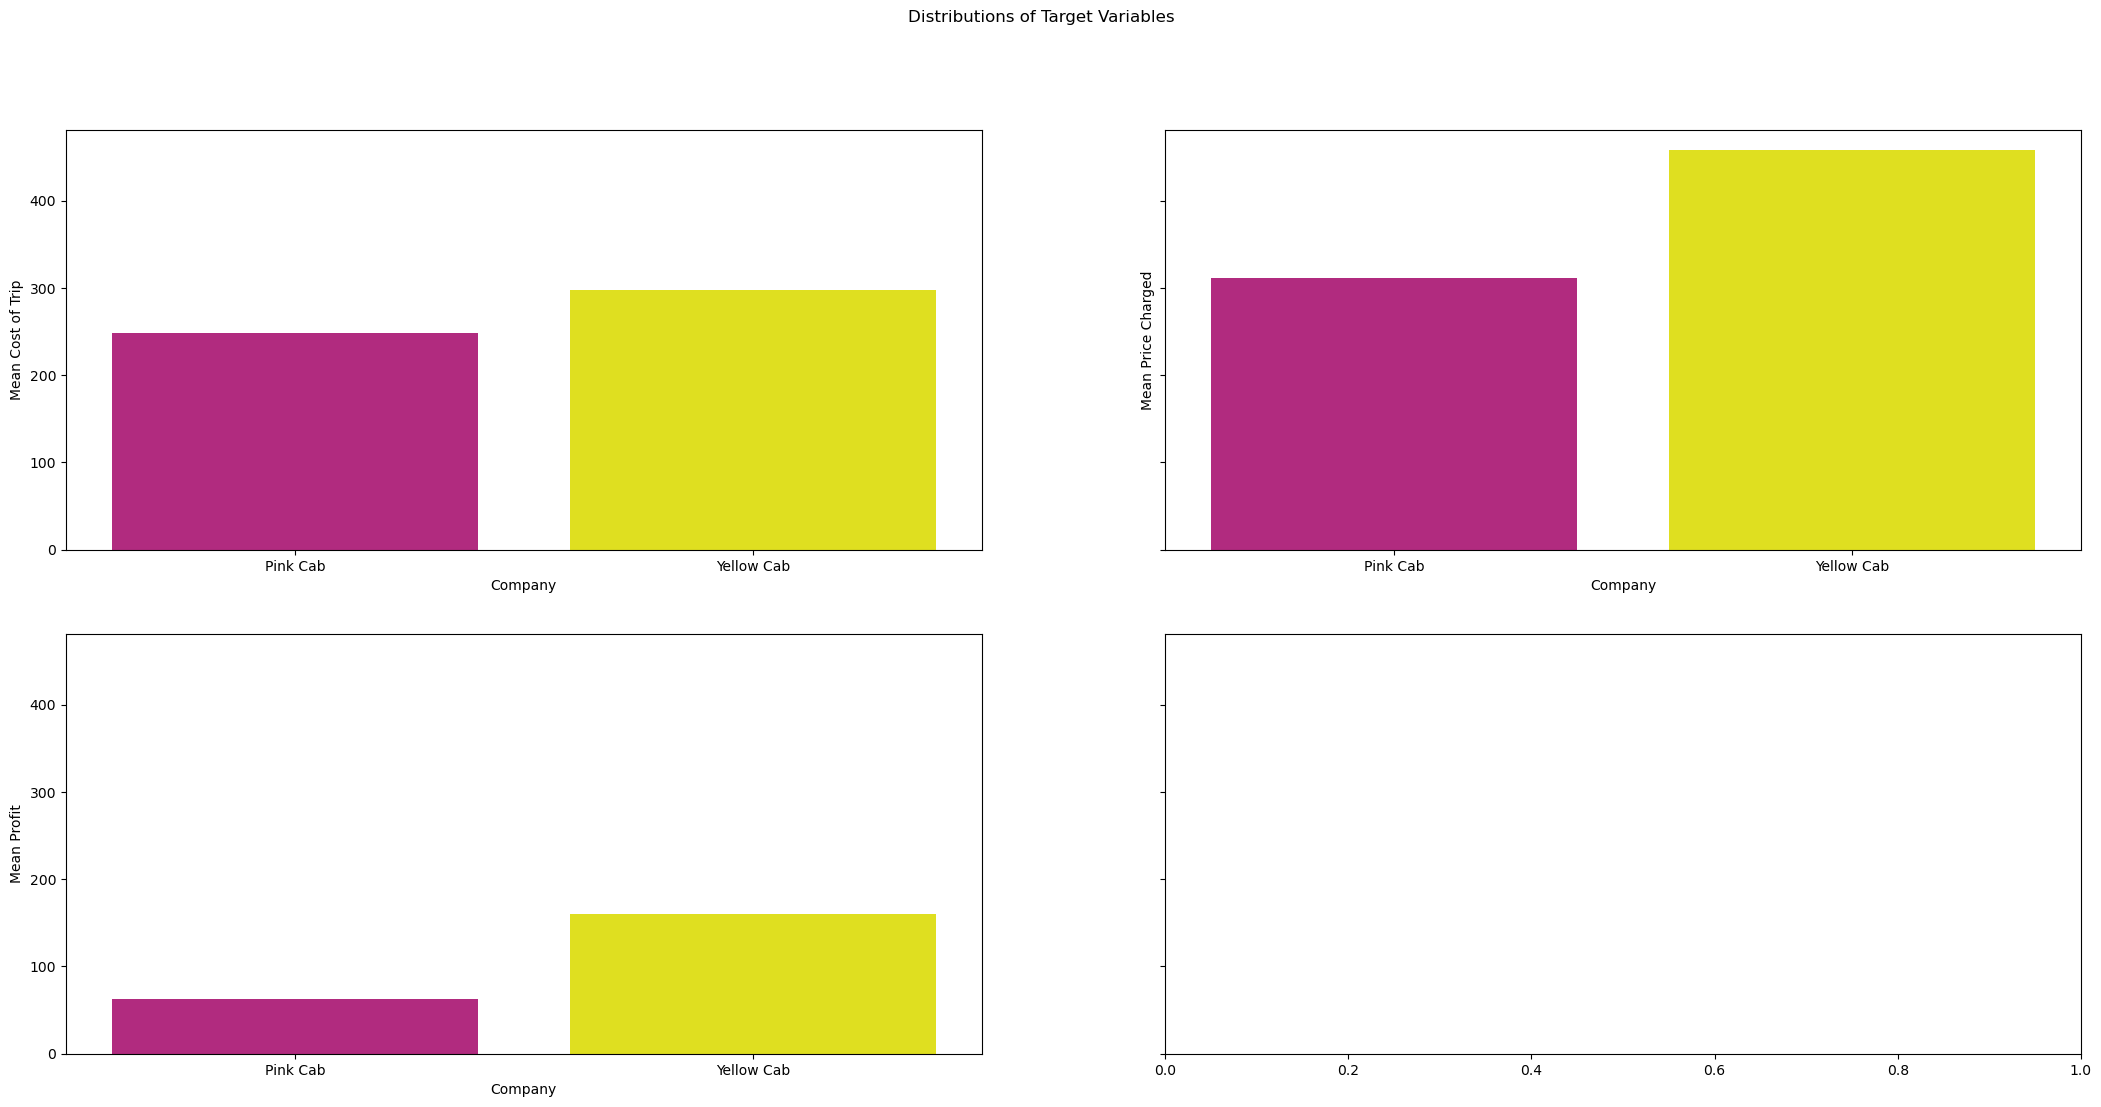

In [37]:
# comparison mean of other values

fig,axes = plt.subplots(2, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

# Use groupby() to group the data by Company and calculate the mean of each variable
mean_cost_of_trip   = df_main.groupby(['Company'])['Cost of Trip'].mean()
mean_price_charged  = df_main.groupby(['Company'])['Price Charged'].mean()
mean_profit         = df_main.groupby(['Company'])['Profit'].mean()

# Use barplot() to create the bar plots
sns.barplot(x=mean_cost_of_trip.index    , y=mean_cost_of_trip  , ax=axes[0,0],palette=palette)
sns.barplot(x=mean_price_charged.index   , y=mean_price_charged , ax=axes[0,1],palette=palette)
sns.barplot(x=mean_profit.index          , y=mean_profit        , ax=axes[1,0],palette=palette)

#Add x and y labels
axes[0,0].set(xlabel='Company', ylabel='Mean Cost of Trip')
axes[0,1].set(xlabel='Company', ylabel='Mean Price Charged')
axes[1,0].set(xlabel='Company', ylabel='Mean Profit')

Text(0, 0.5, 'Yellow Cab')

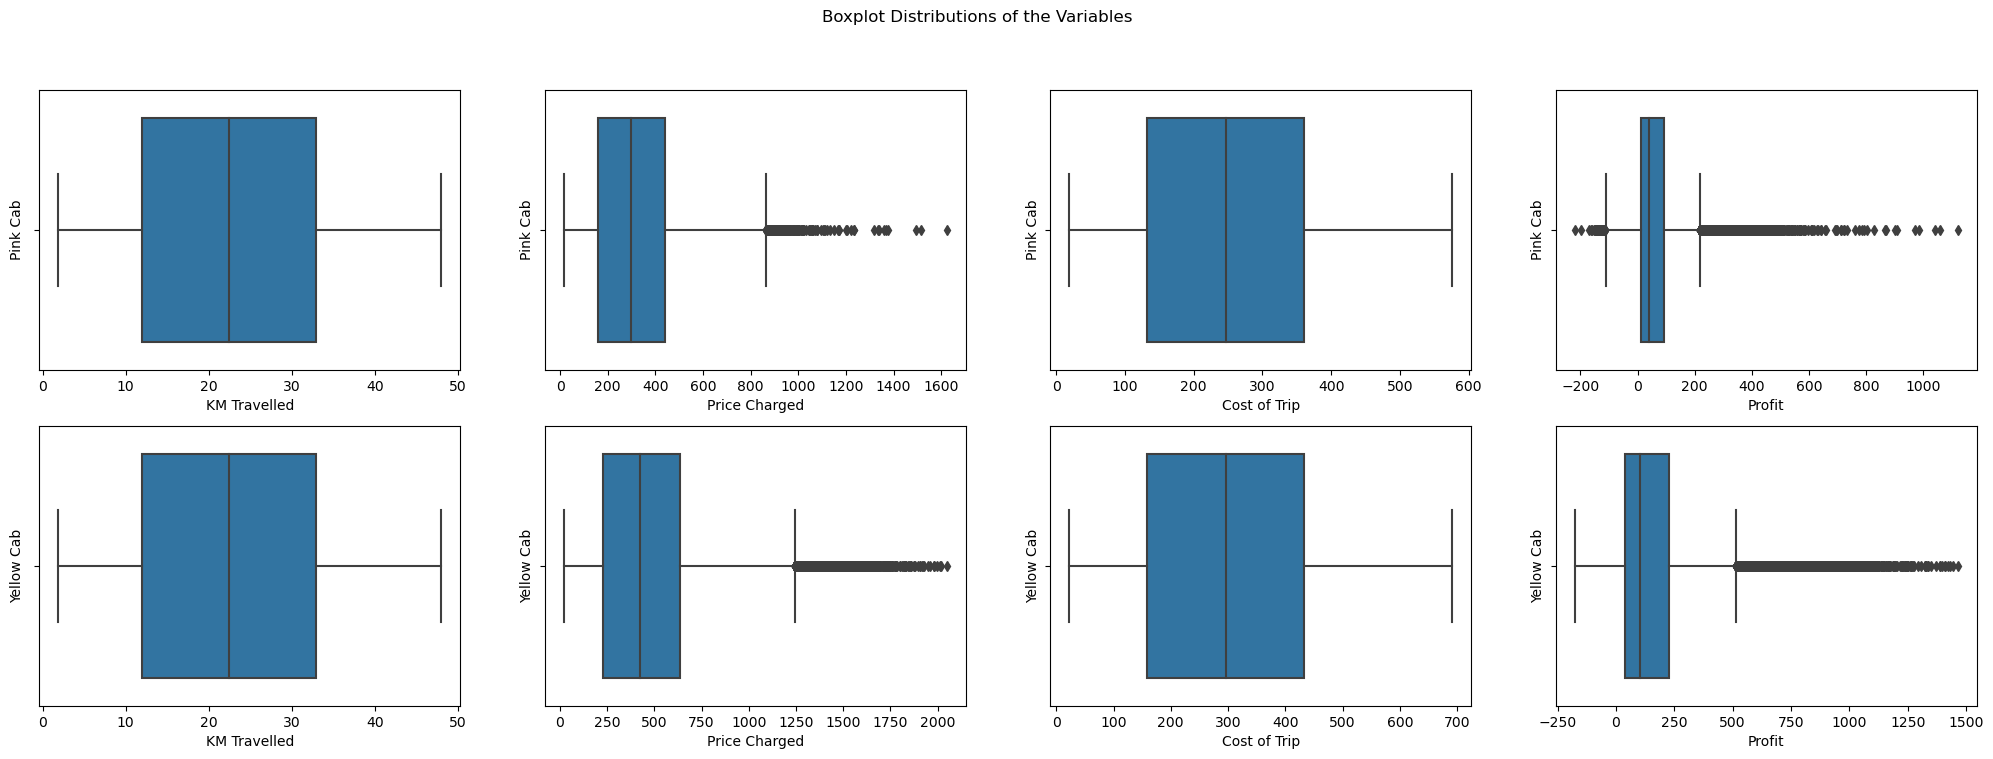

In [38]:
# comparison distribution of other values

fig, axes = plt.subplots(2, 4, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM Travelled'        , data=df_main[df_main["Company"] == "Pink Cab"]).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price Charged'       , data=df_main[df_main["Company"] == "Pink Cab"]).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost of Trip'        , data=df_main[df_main["Company"] == "Pink Cab"]).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,3], x='Profit'              , data=df_main[df_main["Company"] == "Pink Cab"]).set_ylabel("Pink Cab")

sns.boxplot(ax=axes[1,0], x='KM Travelled'        , data=df_main[df_main["Company"] == "Yellow Cab"]).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price Charged'       , data=df_main[df_main["Company"] == "Yellow Cab"]).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost of Trip'        , data=df_main[df_main["Company"] == "Yellow Cab"]).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,3], x='Profit'              , data=df_main[df_main["Company"] == "Yellow Cab"]).set_ylabel("Yellow Cab")


In [39]:
# users by city

fig = go.Figure()
fig.add_trace(go.Bar(
                x=df_main[df_main["Company"] == "Pink Cab"].groupby("City").count().index,
                y=df_main[df_main["Company"] == "Pink Cab"].groupby("City").count()["Users"],
                name='Pink Cab',
                marker_color='mediumvioletred'
                                    ))
fig.add_trace(go.Bar(
                x=df_main[df_main["Company"] == "Yellow Cab"].groupby("City").count().index,
                y=df_main[df_main["Company"] == "Yellow Cab"].groupby("City").count()["Users"],
                name='Yellow Cab',
                marker_color='yellow'
                                    ))
fig.update_layout(
                yaxis_title="Users",
                title="Pink & Yellow Cab Firm Users Distribution Over City" )

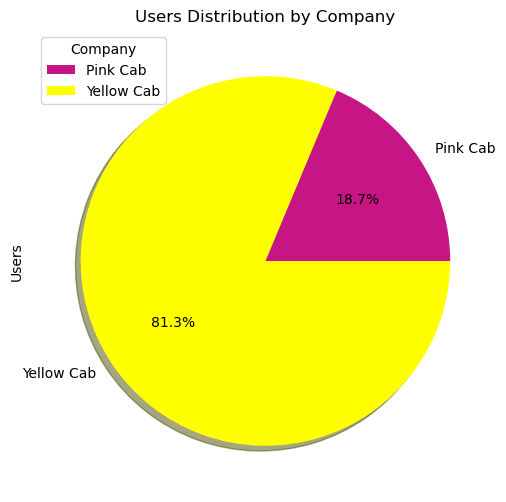

In [40]:
# users by company

user_count = df_main.groupby("Company")["Users"].sum()

plt.figure(figsize=(6,6))
user_count.plot.pie(autopct='%1.1f%%', shadow=True, colors=('mediumvioletred','yellow'))
plt.title("Users Distribution by Company")
plt.legend(title="Company")



In [41]:
# profit by city

fig = go.Figure()
fig.add_trace(go.Bar(
                x=df_main[df_main["Company"] == "Pink Cab"].groupby("City").sum().index,
                y=df_main[df_main["Company"] == "Pink Cab"].groupby("City").sum()["Profit"],
                name='Pink Cab',
                marker_color='mediumvioletred'
                                    ))
fig.add_trace(go.Bar(
                x=df_main[df_main["Company"] == "Yellow Cab"].groupby("City").sum().index,
                y=df_main[df_main["Company"] == "Yellow Cab"].groupby("City").sum()["Profit"],
                name='Yellow Cab',
                marker_color='yellow'
                                    ))
fig.update_layout(
                yaxis_title="Profit",
                title="Profit Distribution Over City for Pink & Yellow Cab Firm" )


In [42]:
fig = go.Figure()
fig.add_trace(go.Bar(
                x=df_main[df_main["Company"] == "Pink Cab"].groupby("City").mean().index,
                y=df_main[df_main["Company"] == "Pink Cab"].groupby("City").mean()["Profit"],
                name='Pink Cab',
                marker_color='mediumvioletred'
                                    ))
fig.add_trace(go.Bar(
                x=df_main[df_main["Company"] == "Yellow Cab"].groupby("City").mean().index,
                y=df_main[df_main["Company"] == "Yellow Cab"].groupby("City").mean()["Profit"],
                name='Yellow Cab',
                marker_color='yellow'
                                    ))
fig.update_layout(
                yaxis_title="Mean Profit",
                title="Mean Profit Distribution Over City for Pink & Yellow Cab Firm" )


Text(0.5, 1.0, 'Price Charged - Cost of Trip')

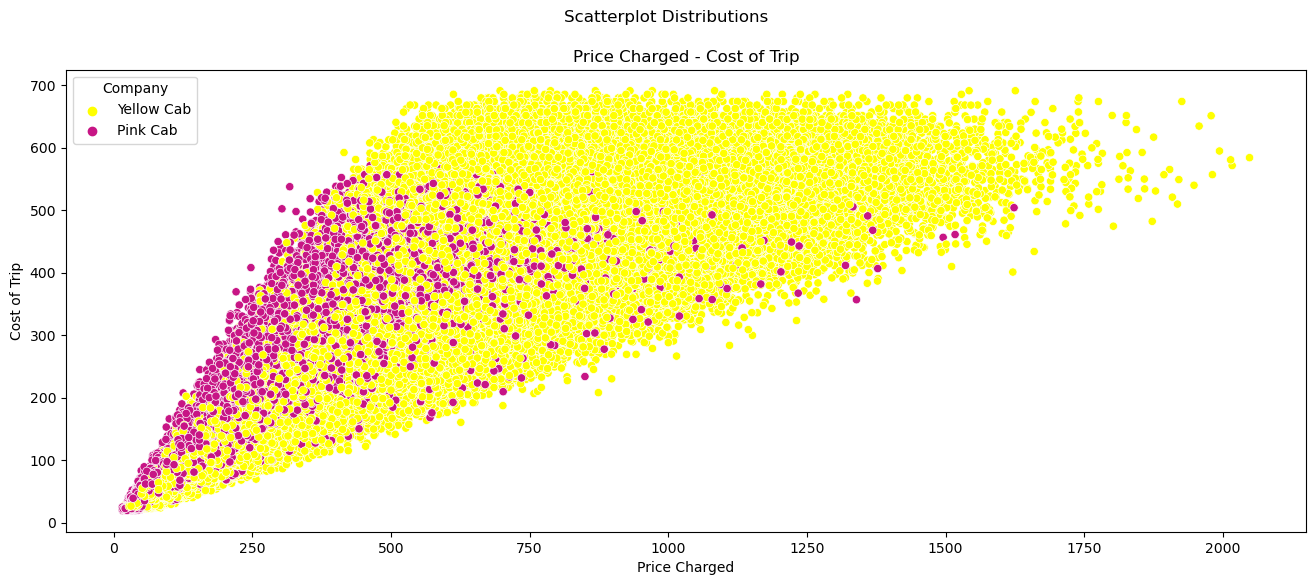

In [43]:
# cost versus price

fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
fig.suptitle('Scatterplot Distributions')
sns.scatterplot(data=df_main, x='Price Charged', y='Cost of Trip' , hue="Company", palette=palette).set_title("Price Charged - Cost of Trip")

Text(0.5, 1.0, 'KM Travelled - Profit')

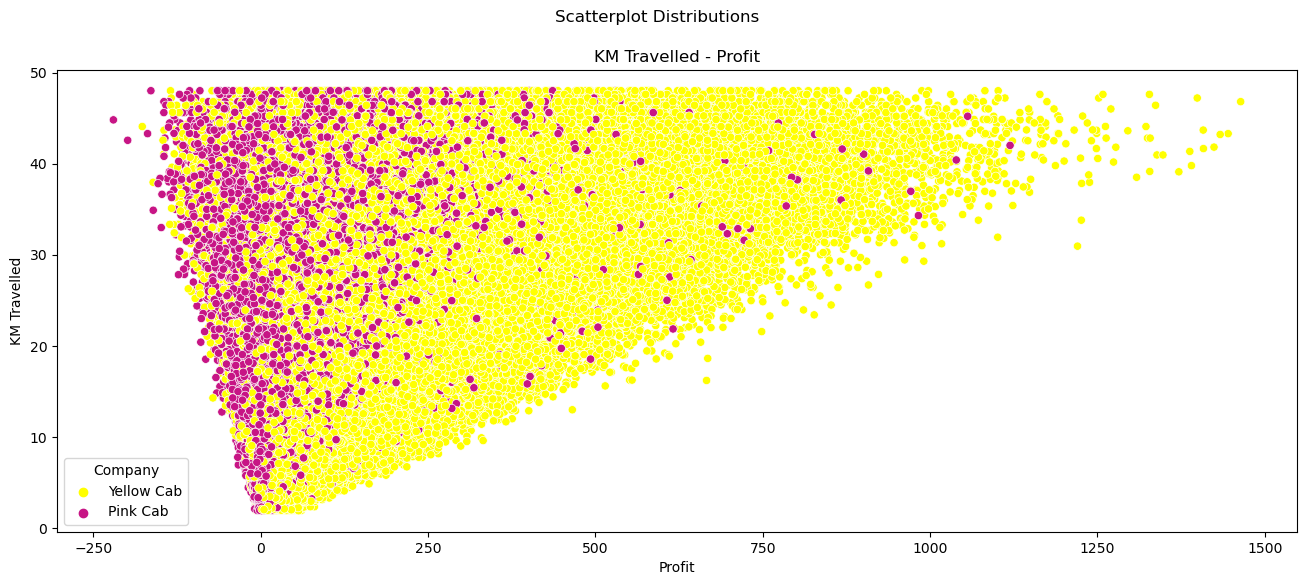

In [44]:
# KM travelled versus profit

fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
fig.suptitle('Scatterplot Distributions')
sns.scatterplot(data=df_main, y='KM Travelled', x='Profit' , hue="Company", palette=palette).set_title("KM Travelled - Profit")

Text(0.5, 1.0, 'KM Travelled - Profit')

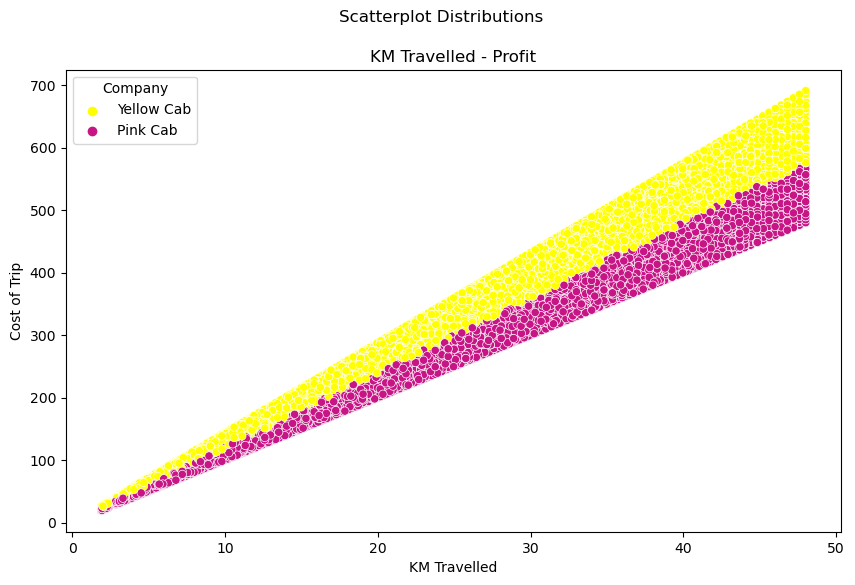

In [45]:
# KM travelled versus Cost of Trip

fig,axes = plt.subplots(figsize=(10, 6), sharey=True)
fig.suptitle('Scatterplot Distributions')
sns.scatterplot(data=df_main, x='KM Travelled', y='Cost of Trip' , hue="Company", palette=palette).set_title("KM Travelled - Profit")

8110490.57999996


Text(0, 0.5, 'KM Travelled')

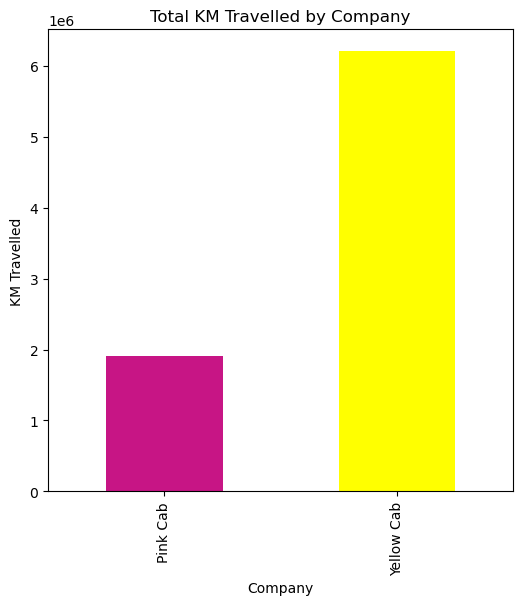

In [46]:
# KM travelled

suma_km = sum(df_main["KM Travelled"])
print(suma_km)

km_travelled = df_main.groupby("Company")["KM Travelled"].sum()

plt.figure(figsize=(6,6))
km_travelled.plot.bar(color=['mediumvioletred','yellow'])
plt.title("Total KM Travelled by Company")
plt.xlabel("Company")
plt.ylabel("KM Travelled")

## 4. Conclution

Responding to the previously raised hypotheses

1. Is there any seasonability in the demand?

Yes, it is stationary.
The Q4 and autumn are the times of greatest demand.

2. Which cities are the most profitable?

The most profitable city is New York. Not only the accumulated but also in its average per trip.

3. Are the profits increasing over the years?

There was an increase from 2016 to 2017 but in 2018 there was a setback, reaching lower profits than in 2016.

4. Which company has maximum cab users?

In the 5 main cities that have the majority of the market, we find that Yellow Cab has the majority of the market share.

5. Which company has the lowest cost per km?

It can be seen that the Yellow Cab company has a lower cost ratio per km


### Final Stata

Based on the analysis of the data and the cab market, it is clear that both Pink Cab and Yellow Cab have their own advantages and potential for growth.

If you are looking for a higher growth potential and willing to take on more risk, investing in Pink Cab could be a good option. However, if you prefer a safer investment with a longer-term outlook, investing in Yellow Cab may be a better choice. Yellow Cab has a proven track record and has a potential to increase profits in the short term through better cost management. Ultimately, the decision will depend on your investment goals and risk tolerance.